<a href="https://colab.research.google.com/github/Tr-tuhin/DIP_Lab_Task_2019331534/blob/main/Copy_of_DIP_lab_exam_sec%5B19_20%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task of DIP Lab Final 2024(SEC 2019-20):
1.  Upload the image(`DIP_Lab_task_01.png`) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]
2.  Convert the RGB image(`DIP_Lab_task_02.jpg`) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]
3.  Apply Image(`DIP_Lab_task_03.png`) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]
4.  Implement an appropriate technique to reduce the brightness of the provided image (`DIP_Lab_task_04.jpg`) effectively. [20]
5.  Solve the segmentation problem for the given image: `'DIP_Lab_task_05.jpg'` [30]



## Lab Resources

https://drive.google.com/drive/folders/1DnF8_teHpzrHNvSspl-W5ooxNyxvUU2t?usp=sharing

Some Instructions to be strictly followed:
- You have to do the task individually but can discuss about the solution approach and possible technique to be applied to get the task done.
- **Do not share any of your code** with your fellow classmates that may have a huge penalty on both of your score.
- Create a git repo and submit the task there. Try to commit after completing each task individually. The git repo should be **private** until the submission.
- Make a video presentation of 4 minutes(max) explaining:
  1. Briefly explain the logical part of each task and what approaches you have taken to solve the problem
  2. Show the graphics output of the tasks
  3. Give a tour of your code
  4. Is there any other way to achieve similar/better results
  5. Mention the sources you got assistance from.[e.g. chatGPT]

### Deadline: 27/12/24 <11:59 pm>
*I won't accept any late submission. Your git repo should be public after 28/12/24 12:00 am*

Submission Link: https://docs.google.com/forms/d/e/1FAIpQLScK7S7uc_zNd4yhNyyAS0J97fq2S4k7fzZcf4pvX3z0E3A2rg/viewform?usp=header

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image Dimensions (Height, Width, Channels): (225, 225, 3)


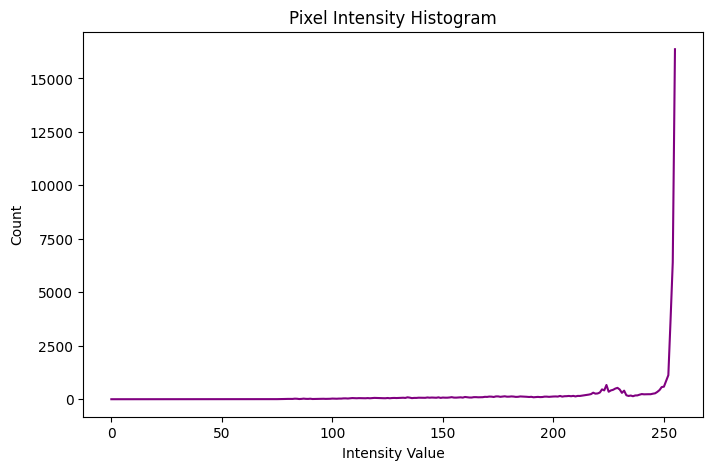

Pixel Intensity Range: 250


In [5]:
# Task 01

# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define the image file path
image_file = '/content/drive/MyDrive/DIP_Final_Image/DIP_Lab_task_01 (1).png'

# Read the image
image_data = cv2.imread(image_file)

# Display the shape of the image
dimensions = image_data.shape
print("Image Dimensions (Height, Width, Channels):", dimensions)

# Compute the histogram for pixel intensities
pixel_histogram = cv2.calcHist([image_data], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.title("Pixel Intensity Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Count")
plt.plot(pixel_histogram, linestyle='-', color='purple')
plt.show()

# Compute the pixel intensity range
pixel_range = np.ptp(image_data)  # Peak-to-Peak difference (max - min)
print(f"Pixel Intensity Range: {pixel_range}")


(-0.5, 379.5, 406.5, -0.5)

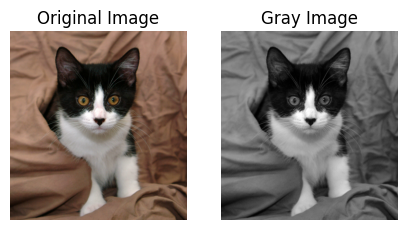

In [6]:
# Task 02

from skimage import io, color
import matplotlib.pyplot as plt

img = io.imread('/content/drive/MyDrive/DIP_Final_Image/DIP_Lab_task_02.jpg')

def rgbtogray(image):
  row, col, ch = np.shape(img)

  ret = np.zeros((row, col), dtype=np.uint8)
  for i in range(row):
    for j in range(col):
      r, g, b = image[i, j]

      ret[i, j] = r * 0.25 + g * 0.50 + b * 0.25

  return ret

fig, ax = plt.subplots(1, 2, figsize = (5, 5))

grayImg = rgbtogray(img)

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(grayImg, cmap = 'gray')
ax[1].set_title('Gray Image')
ax[1].axis('off')


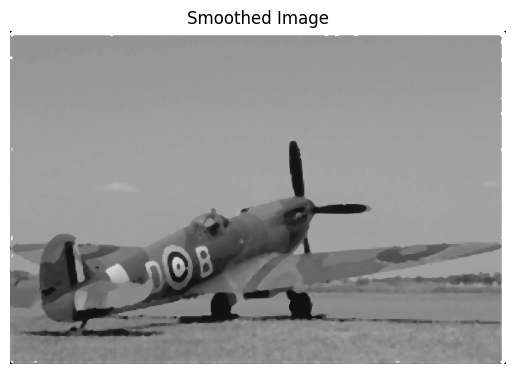

In [7]:
# Task 03

# Image smoothing function
def apply_convolution(image, kernel):
    # Get kernel dimensions and calculate padding
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Add padding to the input image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Initialize the output image
    image_height, image_width = image.shape
    smoothed_image = np.zeros((image_height, image_width))

    # Apply the convolution operation
    for row in range(image_height):
        for col in range(image_width):
            # Extract region of interest (ROI)
            region_of_interest = padded_image[row:row + kernel_height, col:col + kernel_width]
            # Compute the median value and assign it to the output
            smoothed_image[row, col] = np.median(region_of_interest)

    return smoothed_image

# Load the input image and convert to grayscale
image_path = '/content/drive/MyDrive/DIP_Final_Image/DIP_Lab_task_03.png'
input_image = cv2.imread(image_path)
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Define the smoothing kernel
kernel_size = (5, 5)
smoothing_kernel = np.ones(kernel_size, dtype=np.uint8) / 9

# Apply the smoothing function
smoothed_image = apply_convolution(grayscale_image, smoothing_kernel)

# Display the smoothed image
plt.figure()
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')
plt.title('Smoothed Image')
plt.show()


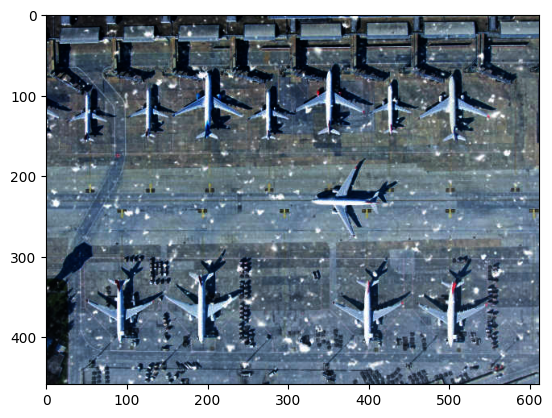

In [8]:
# Task 04

img = io.imread('/content/drive/MyDrive/DIP_Final_Image/DIP_Lab_task_04.jpg')

def gamma_correction(image_data, gamma_value):
    image_data = image_data / 255
    image_data = image_data ** gamma_value
    image_data = image_data * 255
    image_data = image_data.astype(np.uint8)
    return image_data

gamma_img = gamma_correction(img, 3)

plt.imshow(gamma_img)
plt.show()

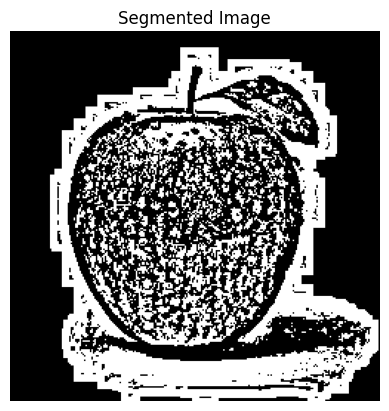

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img5 = cv2.imread('/content/drive/MyDrive/DIP_Final_Image/DIP_Lab_task_05.jpg')

gray_img = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

img6 = np.zeros_like(gray_img)

rows, cols = gray_img.shape
block_size = 11

for i in range(rows):
    for j in range(cols):
        local_sum = 0
        count = 0
        for m in range(i - block_size // 2, i + block_size // 2 + 1):
            for n in range(j - block_size // 2, j + block_size // 2 + 1):
                if 0 <= m < rows and 0 <= n < cols:
                    local_sum += gray_img[m, n]
                    count += 1
        local_threshold = local_sum // count
        if gray_img[i, j] > local_threshold:
            img6[i, j] = 255
        else:
            img6[i, j] = 0

# Plot the segmented image
plt.imshow(img6, cmap='gray')
plt.axis('off')
plt.title('Segmented Image')
plt.show()
